<a href="https://colab.research.google.com/github/pedrosena138/if1014-data-mining/blob/main/MAGIC_Gamma_Telescope_Data_Mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compreensão dos dados

Dono original dos dados:

    R. K. Bock
    Major Atmospheric Gamma Imaging Cherenkov Telescope project (MAGIC)
    http://wwwmagic.mppmu.mpg.de
    rkb@mail.cern.ch

Dono:

    P. Savicky
    Institute of Computer Science, AS of CR
    Czech Republic
    savicky@cs.cas.cz




Os dados foram gerados para simular o registro de partículas gama de alta energia em um telescópio gama Cherenkov atmosférico baseado no solo usando a técnica de imagem. O telescópio gama Cherenkov observa raios gama de alta energia, aproveitando a radiação emitida por partículas carregadas produzidas dentro dos chuveiros eletromagnéticos iniciados pelos gamas, e se desenvolvendo na atmosfera. Esta radiação Cherenkov (de comprimentos de onda visível a UV) vaza pela atmosfera e é registrada no detector, permitindo a reconstrução dos parâmetros do chuveiro. A informação disponível consiste em pulsos deixados pelos fótons Cherenkov recebidos nos tubos fotomultiplicadores, dispostos em um plano, a câmera. Dependendo da energia do gama primário, um total de algumas centenas a cerca de 10.000 fótons de Cherenkov são coletados, em padrões (chamados de imagem do chuveiro), permitindo discriminar estatisticamente aqueles causados ​​por gamas primários (sinal) das imagens de chuveiros hadrônicos iniciados por raios cósmicos na atmosfera superior (ao fundo).

Normalmente, a imagem de um chuveiro após algum pré-processamento é um aglomerado alongado. Seu longo eixo é orientado para o centro da câmera se o eixo do chuveiro for paralelo ao eixo óptico do telescópio, ou seja, se o eixo do telescópio for direcionado para uma fonte pontual. Uma análise de componentes principais é realizada
no plano da câmera, o que resulta em um eixo de correlação e define uma elipse. Se as deposições fossem distribuídas como uma gaussiana bivariada, esta seria uma elipse de equidensidade. Os parâmetros característicos desta elipse (muitas vezes chamados de parâmetros de Hillas) estão entre os parâmetros de imagem que podem ser usados ​​para discriminação. As deposições de energia são tipicamente assimétricas ao longo do eixo principal, e essa assimetria também pode ser usada na discriminação. Existem, além disso, outras características discriminantes, como a extensão do aglomerado no plano da imagem ou a soma total das deposições.

O conjunto de dados foi gerado por um programa Monte Carlo, Corsika, descrito em D. Heck et al., CORSIKA, Um código Monte Carlo para simular extensas chuvas de ar, Forschungszentrum Karlsruhe FZKA 6019 (1998). O programa foi executado com parâmetros que permitem observar eventos com energias abaixo de 50 GeV.

| atributo | tipo     | descrição                                                           | unidade |
|----------|----------|---------------------------------------------------------------------|---------|
| fLength  | contínuo | eixo principal da elipse                                            | mm      |
| fWidth   | contínuo | eixo menor da elipse                                                | mm      |
| fConc    | contínuo | proporção da soma dos dois pixels mais altos sobre fSize            | razão   |
| fConc1   | contínuo | proporção do pixel mais alto sobre fSize                            | razão   |
| fAsym    | contínuo | distância do pixel mais alto ao centro, projetada no eixo principal | mm      |
| fM3Long  | contínuo | raiz cúbica do terceiro momento ao longo do eixo maior              | mm      |
| fM3Trans | contínuo | raiz cúbica do terceiro momento ao longo do eixo menor              | mm      |
| fAlpha   | contínuo | ângulo do eixo maior com o vetor para a origem                      | deg     |
| fDist    | contínuo | distância da origem ao centro da elipse                             | mm      |
| class    | discreto | gamma (signal), hadron (background)                                 |         |



# Configuração

Importando as bilbiotecas

In [2]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")
%matplotlib inline

# ajustando os parâmetros gráficos
plt.rcParams['figure.figsize'] = [12, 8]


Caregando a base de dados

In [3]:
# carregando os ids dos atributos
names = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans',  'fAlpha', 'fDist','class']
filepath = 'https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data'
dataframe = pd.read_csv(filepath, sep="," , names=names )

# Análise Exploratória

## Visão Geral

Analisando os primeiros 5 registros da base

In [5]:
dataframe.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


Verificando: 
- Total de registros 
- Tipos dos dados
- Valores ausentes

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19020 entries, 0 to 19019
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   fLength   19020 non-null  float64
 1   fWidth    19020 non-null  float64
 2   fSize     19020 non-null  float64
 3   fConc     19020 non-null  float64
 4   fConc1    19020 non-null  float64
 5   fAsym     19020 non-null  float64
 6   fM3Long   19020 non-null  float64
 7   fM3Trans  19020 non-null  float64
 8   fAlpha    19020 non-null  float64
 9   fDist     19020 non-null  float64
 10  class     19020 non-null  object 
dtypes: float64(10), object(1)
memory usage: 1.6+ MB


A base possui 19020 registros, sem nenhum dado faltante e todas as colunas tirando a `class` são valores numéricos

Verificação de valores duplicados

In [7]:
print('Qtd. de valores duplicados:', sum(dataframe.duplicated()))

Qtd. de valores duplicados: 115


## Dados Categóricos

Como visto anteriormente, a base só possui uma coluna categórica, a coluna `class`

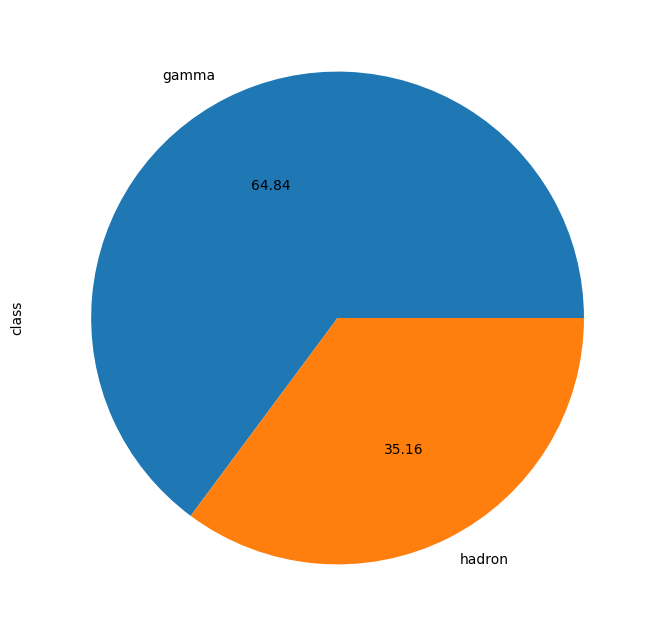

In [22]:
  dataframe['class'].value_counts().plot.pie(labels=['gamma', 'hadron'], autopct='%.2f')
  plt.show()

É possível ver que a base apresenta um desbalanceamento na coluna `class`. Por razões técnicas, o número de *h* eventos é subestimado. Nos dados reais, a classe *h* representa a maioria dos eventos.

## Dados Numéricos

Visão geral da distribuição dos dados numéricos

In [24]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
fLength,19020.0,53.250154,42.364855,4.2835,24.336000,37.14770,70.122175,334.1770
fWidth,19020.0,22.180966,18.346056,0.0000,11.863800,17.13990,24.739475,256.3820
fSize,19020.0,2.825017,0.472599,1.9413,2.477100,2.73960,3.101600,5.3233
fConc,19020.0,0.380327,0.182813,0.0131,0.235800,0.35415,0.503700,0.8930
fConc1,19020.0,0.214657,0.110511,0.0003,0.128475,0.19650,0.285225,0.6752
fAsym,19020.0,-4.331745,59.206062,-457.9161,-20.586550,4.01305,24.063700,575.2407
fM3Long,19020.0,10.545545,51.000118,-331.7800,-12.842775,15.31410,35.837800,238.3210
fM3Trans,19020.0,0.249726,20.827439,-205.8947,-10.849375,0.66620,10.946425,179.8510
fAlpha,19020.0,27.645707,26.103621,0.0000,5.547925,17.67950,45.883550,90.0000
fDist,19020.0,193.818026,74.731787,1.2826,142.492250,191.85145,240.563825,495.5610


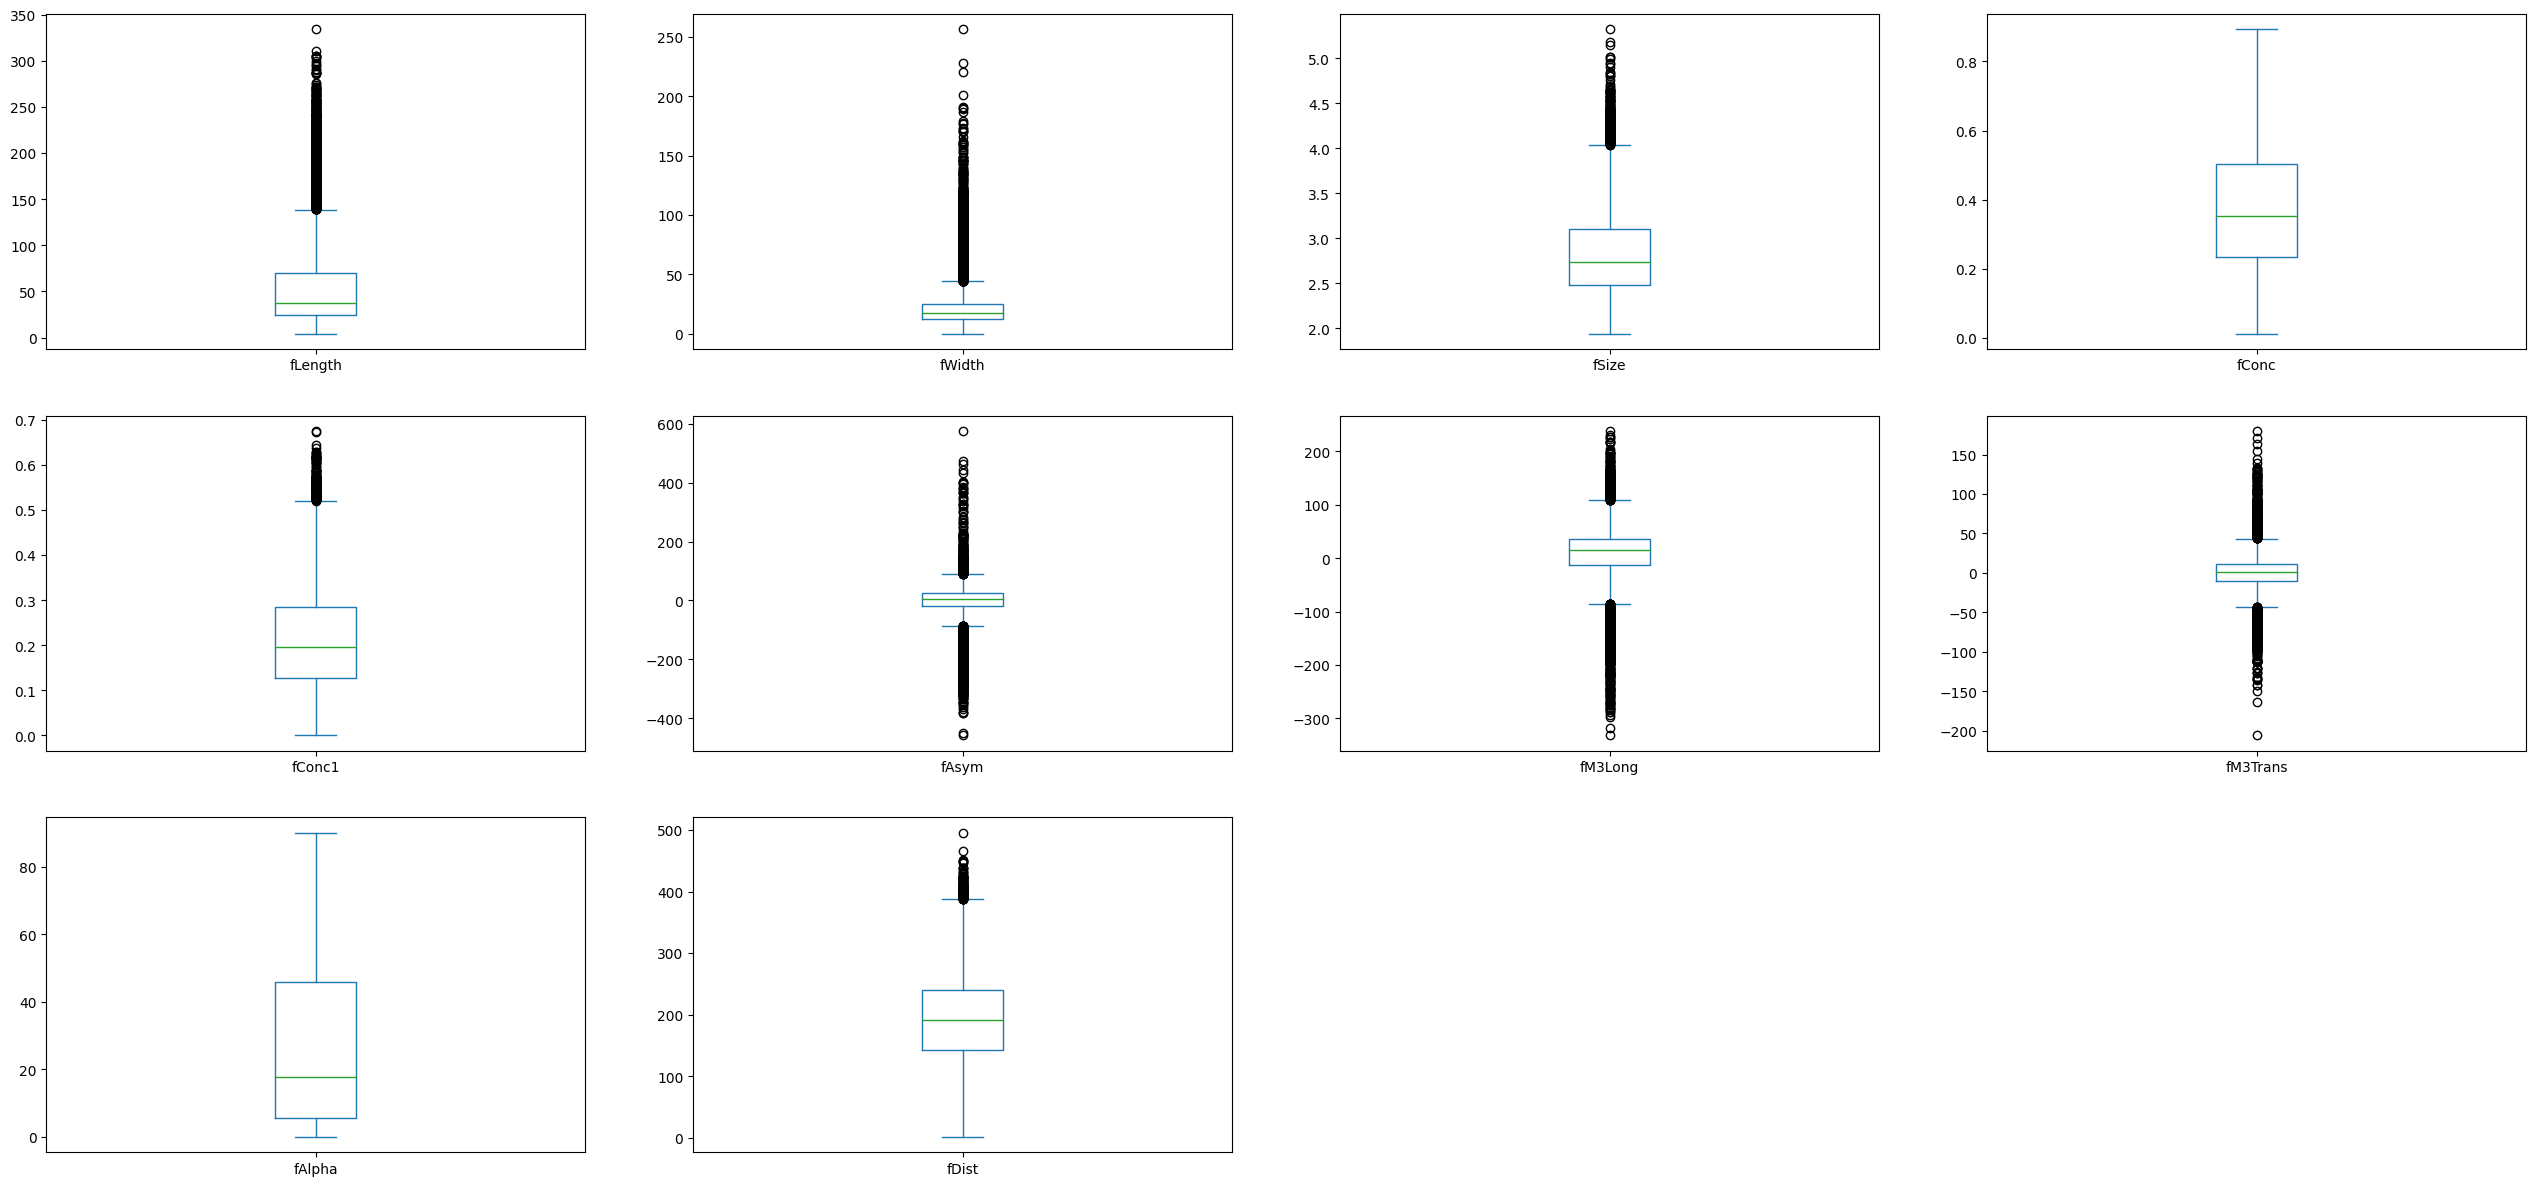

In [31]:
dataframe.plot(kind='box', subplots=True, layout=(4,4), sharex=False, sharey=False, figsize=(32,20))
plt.show()

Analisando os boxplots, é possível ver uma grande quantidade de outliers na maioria dos dados categóricos. A criação de histogramas auxilia a visualizar melhor a tendência mostrada nos boxplots.

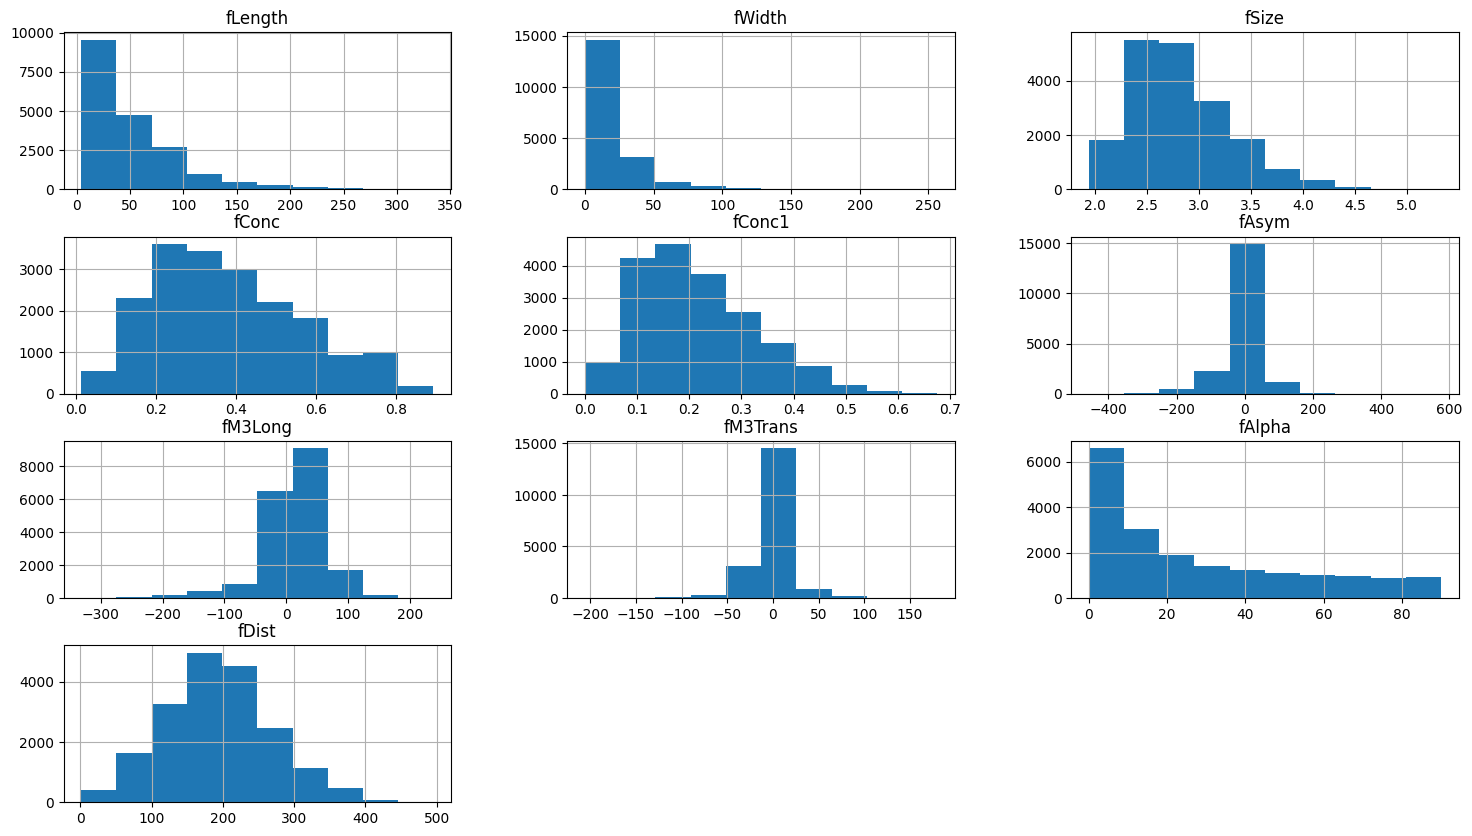

In [35]:
dataframe.hist(figsize=(18,10))
plt.show()

Para verificar a correlação dos dados é necessário utilizar a matriz de correlação

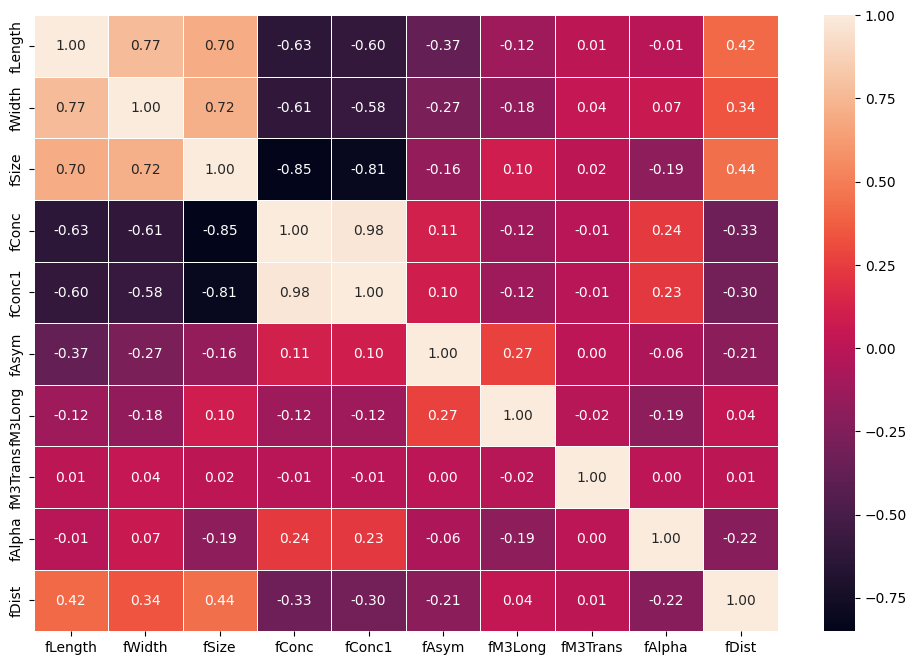

In [25]:
sns.heatmap(dataframe.corr(), annot = True, fmt=".2f", linewidths=.6)
plt.show()

Observa-se que há uma correlação direta quase perfeita entre os atributos fConc e fConc1 (R = 0.98), uma correlação alta entre fLength e fWidth (R=0.77), fLength e fSize (R = 0. 70) e, fWidth e fSize (R = 0.72). A base de dados apresenta também uma forte correlação inversa entre fConc e fSize (R= -0,85) e fConc1 e fSize (R= -0,81). Para auxiliar nessa análise pode-se utilizar gráficos de dispersão

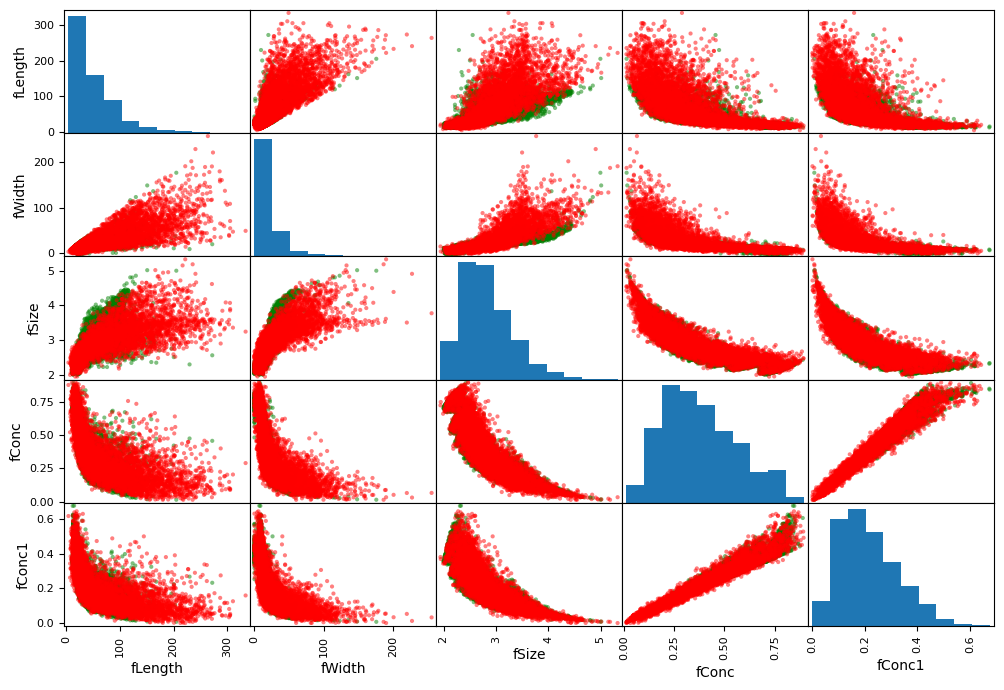

In [29]:
colors_palette = {'h': 'red', 'g': 'green'}
c = [colors_palette[c] for c in dataframe['class']]

subset = dataframe[['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1']]
scatter_matrix(subset, c=c)

# plt.figure(figsize=(25, 10))
plt.show()

# Pré-processamento

In [ ]:
#eliminando instâncias duplicadas
#df.drop_duplicates(inplace=True)